In [2]:
from datasets import load_dataset

import torch

/home/samitha/miniconda3/envs/torch/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
dataset = load_dataset("/home/samitha/Projects/datasets/imagenet100")
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 126689
    })
    validation: Dataset({
        features: ['image', 'label'],
        num_rows: 5000
    })
})

In [4]:
print(dataset["train"][0]['image'])

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=213x160 at 0x7B0CD74F4A90>


In [5]:
sample = dataset['train'][5000]
sample


{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=240x160>,
 'label': 3}

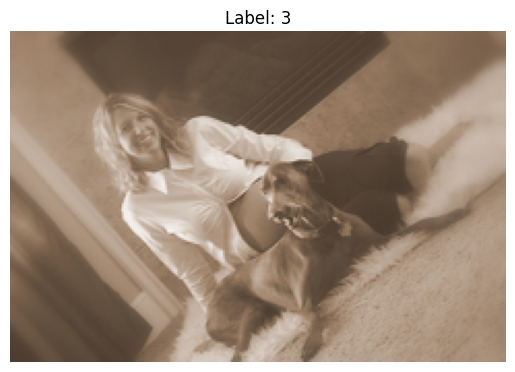

In [6]:
from PIL import Image
import matplotlib.pyplot as plt

img = sample["image"]
label = sample["label"]

plt.imshow(img)
plt.title(f"Label: {label}")
plt.axis("off")
plt.show()

In [7]:
from torchvision import transforms

transform = transforms.Compose([transforms.Resize(256),transforms.CenterCrop(224),transforms.ToTensor()])


image_t = transform(img)
image_t.shape

torch.Size([3, 224, 224])

In [8]:
train_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandAugment(num_ops=2, magnitude=9),  # ViT style random augmentation
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


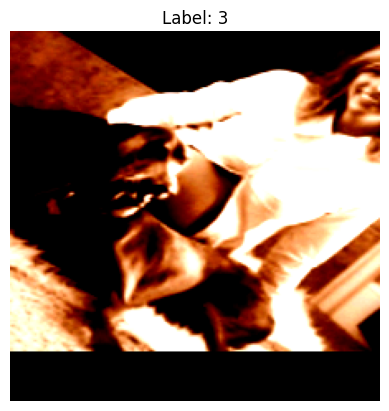

In [9]:
torch.manual_seed(50)
out = train_transform(img)

plt.imshow(out.permute(1, 2, 0))
plt.title(f"Label: {label}")
plt.axis("off")
plt.show()

In [18]:
xb = [transform(img) for img in dataset['train'][:100]['image']]
torch.tensor(xb)

ValueError: only one element tensors can be converted to Python scalars

In [20]:
xb = dataset['train'][20:30]

In [21]:
xb['image']

[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=160x240>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=160x213>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=160x184>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=213x160>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=213x160>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=160x239>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=213x160>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=213x160>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=160x202>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=204x160>]

In [22]:
xb['label']

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]